In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
pd.options.plotting.backend = "plotly"

sns.set_style('whitegrid')
SMALL_SIZE = 14
MEDIUM_SIZE = 15
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize=(15,15))

In [2]:
df = pd.read_excel('D_caretta.xlsx', sheet_name="new_pop")

In [3]:
df = df.rename(columns={'CCL': 'Taglia'})

In [4]:
df.head()

,Anno,Stagione,Taglia,Regione
0,2013,Autunno,58.0,Puglia
1,2008,Autunno,68.0,Puglia
2,2014,Inverno,35.0,Puglia
3,2015,Autunno,40.0,Puglia
4,2016,Primavera,68.0,Puglia


In [5]:
df.describe()

,Anno,Taglia
count,427.000000,415.000000
mean,2014.927400,43.772530
std,2.978306,21.742833
min,2006.000000,0.000000
25%,2014.000000,30.000000
50%,2016.000000,48.500000
75%,2017.000000,60.000000
max,2018.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Anno      427 non-null    int64  
 1   Stagione  427 non-null    object 
 2   Taglia    415 non-null    float64
 3   Regione   427 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 13.5+ KB


In [7]:
df.head()

,Anno,Stagione,Taglia,Regione
0,2013,Autunno,58.0,Puglia
1,2008,Autunno,68.0,Puglia
2,2014,Inverno,35.0,Puglia
3,2015,Autunno,40.0,Puglia
4,2016,Primavera,68.0,Puglia


In [8]:
df = df.dropna()

In [35]:
df

,Anno,Stagione,Taglia,Regione
0,2013,Autunno,58.0,Puglia
1,2008,Autunno,68.0,Puglia
2,2014,Inverno,35.0,Puglia
3,2015,Autunno,40.0,Puglia
4,2016,Primavera,68.0,Puglia
...,...,...,...,...
420,2018,Estate,62.0,Basilicata
421,2018,Estate,61.5,Basilicata
422,2018,Estate,50.0,Basilicata
423,2018,Estate,53.5,Basilicata


In [9]:
df = df.drop(index=df[df['Taglia'] == 0].index)

In [10]:
df['Stagione'].value_counts()

Estate       238
Autunno       72
Primavera     68
Inverno       23
Name: Stagione, dtype: int64

In [11]:
df['Anno'].value_counts()

2016    80
2017    75
2018    69
2015    47
2014    40
2012    26
2008    24
2013    23
2006     9
2011     4
2007     4
Name: Anno, dtype: int64

In [70]:
df['Taglia']

0      58.0
1      68.0
2      35.0
3      40.0
4      68.0
       ... 
420    62.0
421    61.5
422    50.0
423    53.5
424    69.0
Name: Taglia, Length: 364, dtype: float64

In [61]:
df['Taglia'].plot()

In [62]:
df[df['Taglia'] > 5].reset_index()['Taglia'].plot()

In [14]:
df = df[df['Taglia'] != 5]

In [15]:
px.scatter_matrix(df,
                  color='Stagione',
                  symbol='Regione',
                  height=700,
                  template='plotly_white',
                  color_discrete_map={
                      'Autunno': 'goldenrod',
                      'Inverno': 'lightskyblue',
                      'Primavera': 'palegreen',
                      'Estate': 'coral'})

In [30]:
px.scatter(df,
           x='Anno',
           y='Taglia',
           color='Stagione',
           symbol='Regione',
           height=700,
           color_discrete_map={
               'Autunno': 'goldenrod',
               'Inverno': 'lightskyblue',
               'Primavera': 'palegreen',
               'Estate': 'coral'})

In [17]:
px.box(data_frame=df, x='Regione', y='Taglia')

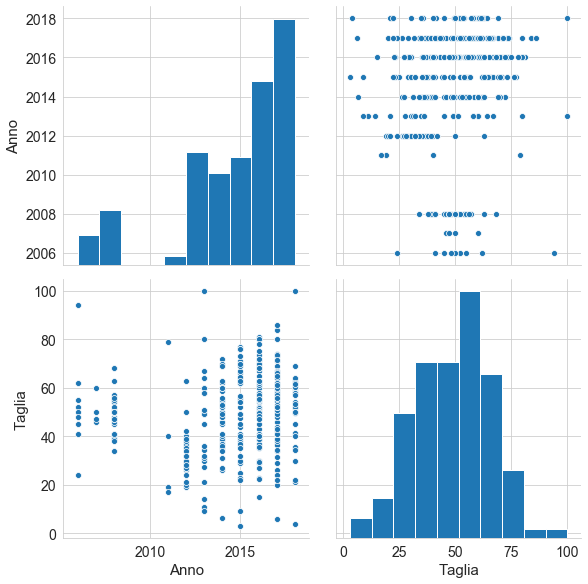

In [27]:
sns.pairplot(df, height=4)
plt.savefig("scatterplot.png")

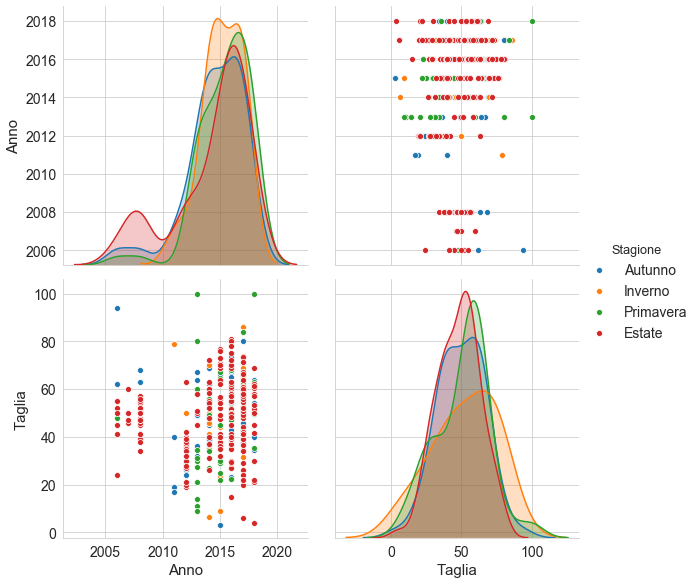

In [28]:
sns.pairplot(df, hue='Stagione', height=4)
plt.savefig("scatterplot_stagioni.png")

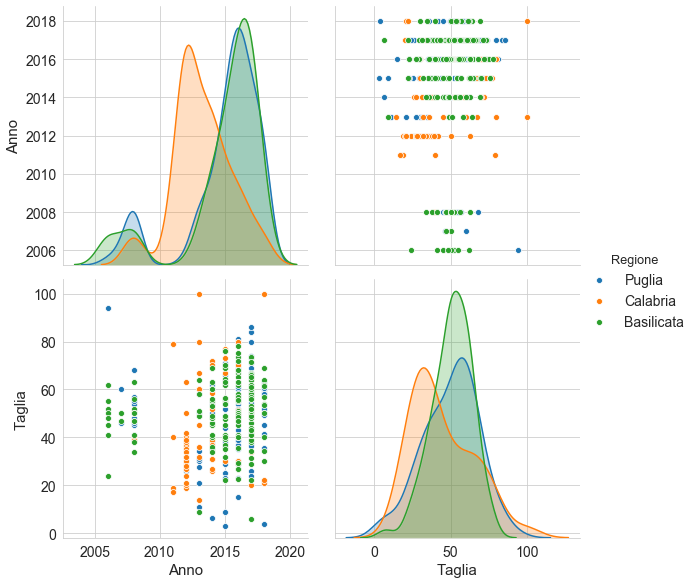

In [29]:
sns.pairplot(df, hue='Regione', height=4)
plt.savefig("scatterplot_regioni.png")

## Stagioni

In [21]:
from scipy.stats import ttest_ind

In [22]:
stagioni = [x for _, x in df.groupby('Stagione')]
stagioni = {
    'primavera': stagioni[3],
    'estate': stagioni[1],
    'autunno': stagioni[0],
    'inverno': stagioni[2]    
}

indici = ('Statistica', 'p-value')

In [23]:
mat_t = pd.DataFrame(columns=stagioni, index=pd.MultiIndex.from_product((stagioni, indici)), dtype='float')

In [24]:
for i in stagioni:
    for k in stagioni:
        mat_t.loc[i, k] = ttest_ind(stagioni[i]['Taglia'], stagioni[k]['Taglia'])

In [25]:
mat_t.xs('p-value', level=1)

,primavera,estate,autunno,inverno
primavera,1.000000,0.194786,0.728410,0.812762
estate,0.194786,1.000000,0.375102,0.247302
autunno,0.728410,0.375102,1.000000,0.618073
inverno,0.812762,0.247302,0.618073,1.000000


## Anni

In [32]:
anni = [x for _, x in df_c.groupby('Anno')]
anni2 = {}

NameError: name 'df_c' is not defined

In [ ]:
for i in anni:
    anni2[i.iloc[0]['Anno']] = i

In [ ]:
anni = anni2

In [ ]:
indici = ('Statistica', 'p-value')

In [ ]:
mat_t_anni = pd.DataFrame(columns=anni, index=pd.MultiIndex.from_product((anni, indici)), dtype='float')

In [ ]:
for i in anni:
    for k in anni:
        mat_t_anni.loc[i, k] = ttest_ind(anni[i]['Taglia'], anni[k]['Taglia'])

In [ ]:
mat_t_anni.xs('p-value', level=1)[mat_t_anni.xs('p-value', level=1) <= 0.05]

## Regioni

In [38]:
regioni = [x for _, x in df_c.groupby('Regione')]
regioni2 = {}

In [39]:
for i in regioni:
    regioni2[i.iloc[0]['Regione']] = i

In [40]:
regioni = regioni2

In [41]:
indici = ('Statistica', 'p-value')

In [42]:
mat_t_regioni = pd.DataFrame(columns=regioni, index=pd.MultiIndex.from_product((regioni, indici)), dtype='float')

In [43]:
for i in regioni:
    for k in regioni:
        mat_t_regioni.loc[i, k] = ttest_ind(regioni[i]['Taglia'], regioni[k]['Taglia'])

In [44]:
mat_t_regioni.xs('p-value', level=1)[mat_t_regioni.xs('p-value', level=1) <= 0.05]

,Basilicata,Calabria,Puglia
Basilicata,NaN,0.005588,NaN
Calabria,0.005588,NaN,NaN
Puglia,NaN,NaN,NaN


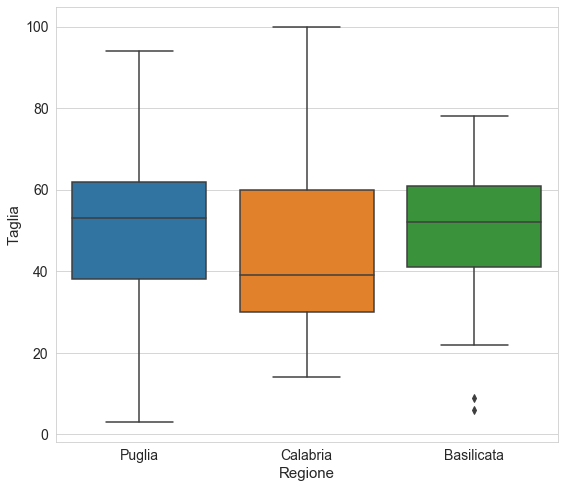

In [63]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df, x='Regione', y='Taglia')

plt.savefig("boxplot_regione.png")

In [46]:
df[df['Regione'] == 'Calabria']['Taglia'].plot(kind='hist')

In [47]:
df[df['Regione'] == 'Calabria']['Anno'].value_counts() / df[df['Regione'] == 'Calabria']['Anno'].value_counts().sum()

2012    0.333333
2014    0.186667
2013    0.120000
2016    0.093333
2015    0.080000
2011    0.053333
2008    0.053333
2018    0.040000
2017    0.040000
Name: Anno, dtype: float64

In [48]:
df[df['Regione'] == 'Calabria']['Anno'].value_counts().sum()

75

In [49]:
calabria = df[df['Regione'] == 'Calabria']
anno1314 = df[(df['Anno'] == 2013) | (df['Anno'] == 2014)]
anno1314 = anno1314[anno1314['Regione'] == 'Calabria']
anno12 = df[df['Anno'] == 2012]
anno12 = anno12[anno12['Regione'] == 'Calabria']

In [50]:
anno1314['Taglia'].mean()

50.45652173913044

In [51]:
anno12['Taglia'].mean()

32.8

In [52]:
df['Taglia'].mean()

49.39725274725274

In [53]:
calabria[calabria['Anno'] != 2012]['Taglia'].mean()

50.86

In [54]:
calabria[calabria['Anno'] == 2017]['Taglia'].mean()

34.666666666666664

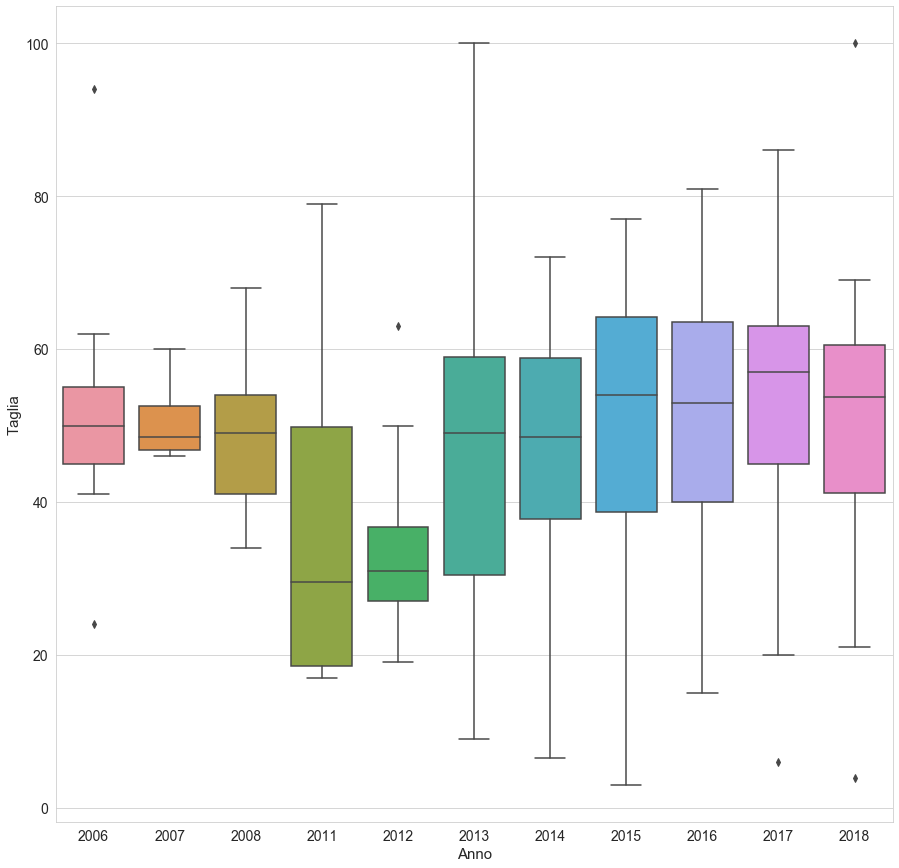

In [64]:
sns.boxplot(data=df, x='Anno', y='Taglia')

plt.savefig("boxplot_anni.png")

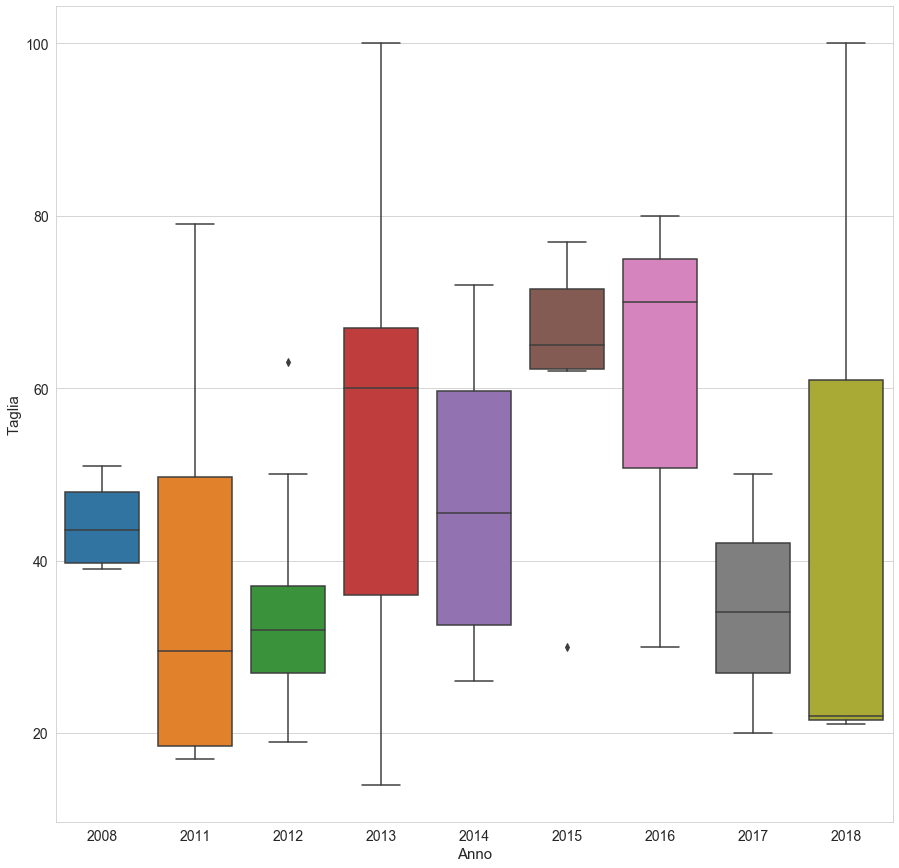

In [65]:
sns.boxplot(data=calabria, x='Anno', y='Taglia')

plt.savefig("boxplot_calabria.png")

In [57]:
df[df['Anno'] == 2013]

,Anno,Stagione,Taglia,Regione
0,2013,Autunno,58.0,Puglia
18,2013,Estate,50.0,Puglia
21,2013,Primavera,34.5,Puglia
22,2013,Primavera,21.0,Puglia
23,2013,Primavera,30.0,Puglia
24,2013,Primavera,31.0,Puglia
26,2013,Primavera,27.5,Puglia
27,2013,Primavera,11.0,Puglia
176,2013,Autunno,36.0,Calabria
177,2013,Autunno,32.0,Calabria


In [58]:
df[df['Anno'] == 2014]

,Anno,Stagione,Taglia,Regione
2,2014,Inverno,35.0,Puglia
28,2014,Autunno,38.0,Puglia
29,2014,Autunno,60.0,Puglia
30,2014,Autunno,62.0,Puglia
31,2014,Estate,55.0,Puglia
32,2014,Estate,54.0,Puglia
33,2014,Inverno,50.0,Puglia
34,2014,Inverno,46.0,Puglia
35,2014,Inverno,6.5,Puglia
180,2014,Autunno,39.0,Calabria


In [59]:
df[df['Anno'] == 2017]['Regione'].value_counts()

Basilicata    50
Puglia        22
Calabria       3
Name: Regione, dtype: int64

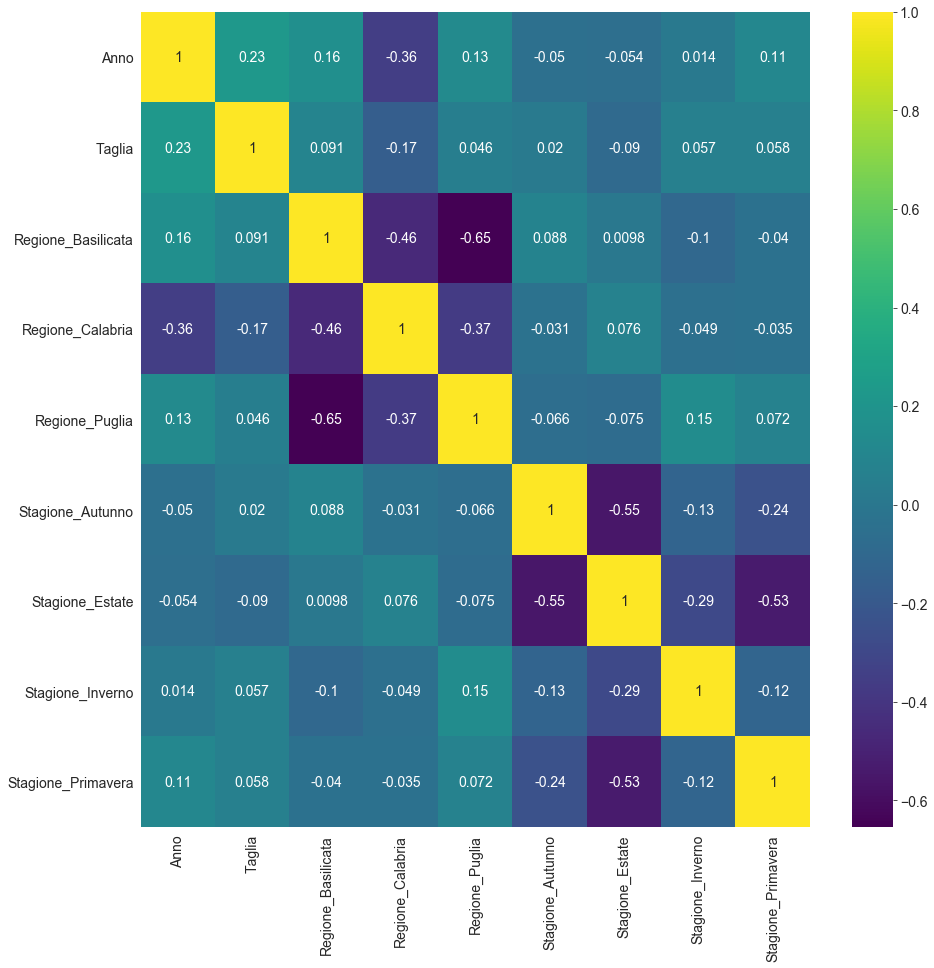

In [60]:
sns.heatmap(pd.get_dummies(df, columns=['Regione', 'Stagione']).corr(method='spearman'), cmap='viridis', annot=True)

KeyError: 'Calabria'